In [3]:
import pysindy as ps
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
#from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [14, 10]

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars

**Lorenz Model**

In [7]:
dt = 0.01
T = 50
t = np.arange(dt,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28
n = 3

def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = (-8,8,27)

x = integrate.odeint(lorenz_deriv, x0, t,rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))


In [60]:
def print_lorenz_eq():
    equazioni_lorenz = """
(x)' = 10 (y - x)
(y)' = x (28 - z) - y
(z)' = x y - 2.66 z
    """   
    print(equazioni_lorenz)

Plot of Trajectories

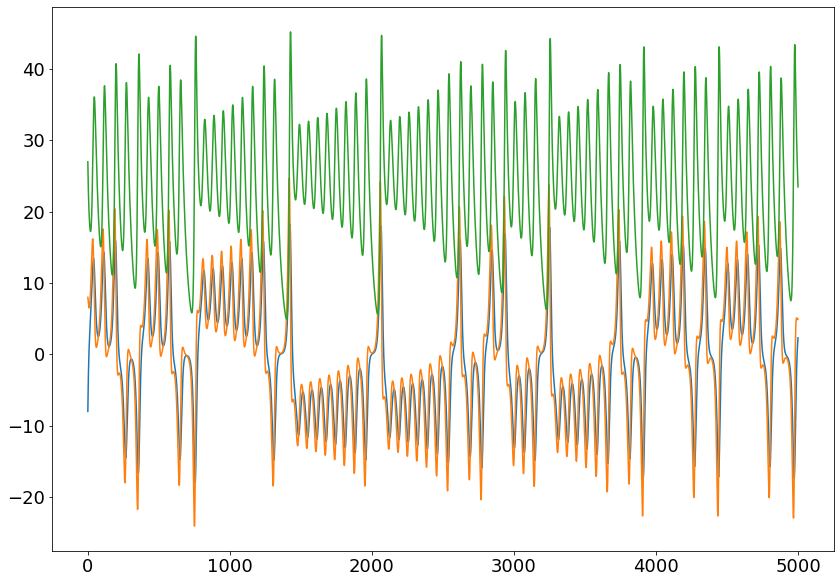

In [9]:
plt.figure(figsize=(14,10))
plt.plot(x)
plt.show()

**SINDY MODEL**

Library of function

In [12]:
library_functions = [
    lambda x: np.sin(x),
    lambda x: np.cos(x),
    lambda x: np.tanh(x),
    lambda x: np.sinh(x),
]
library_function_names = [
    lambda x: "sin",
    lambda x: "cos",
    lambda x: "tanh",
    lambda x: "sinh",
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

library=ps.PolynomialLibrary(degree=3)+custom_library

Training

In [13]:
feature_names = ['x', 'y', 'z']

sparse_regression_optimizer = ps.STLSQ(threshold=0.1) # default is lambda = 0.1
model = ps.SINDy(feature_names=feature_names, optimizer=sparse_regression_optimizer,feature_library=library)
model.fit(x, t=dt)


SINDy(differentiation_method=FiniteDifference(),
      feature_library=<pysindy.feature_library.base.ConcatLibrary object at 0x7f556bb708e0>,
      feature_names=['x', 'y', 'z'], optimizer=STLSQ())

System Print: after training it recreates Lorenz System

In [63]:
print("Trained model\n")
model.print()
model.coefficients()
print("\nTrue model")
print_lorenz_eq()

Trained model

(x)' = -9.978 x + 9.978 y
(y)' = 27.805 x + -0.963 y + -0.995 x z
(z)' = -2.659 z + 0.997 x y

True model

(x)' = 10 (y - x)
(y)' = x (28 - z) - y
(z)' = x y - 2.66 z
    



(x)' = 10 (y - x)
(y)' = x (28 - z) - y
(z)' = x y - 2.66 z
    
